In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from random import seed, shuffle
import os

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="white")

from sklearn.cluster import KMeans, SpectralClustering

from scipy import stats
from scipy.spatial.distance import directed_hausdorff, euclidean, cosine, pdist

from src.downsample import downsamp_audio
import src.embedding_extractor as ee
import src.dimension_reducer as dr
import src.distance_metrics as dm

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

one_samp_toy_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/one_samp_toy_downsamp' #toy dataset with one participant recording @16kHz
#two_samp_toy_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/two_samp_toy_downsamp'#toy dataset with two participant recordings @16kHz
two_samp_toy_dir ='/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/020422_postpartum_moms_two_samp_toy'
down_sampled_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/downsamp'#all the data, downsampled to 16kHz
embedding_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/embeddings' #location of embeddings save new embeddings load pre-generated ones from here
emb_models = ['emb_ami', 'emb','emb_voxceleb'] #names of pretrained embedding extractor models

#the directory has other csvs and i only want today's
file = [file for file in os.listdir(embedding_dir) if file.startswith("020322")] 

#create a dictionary where each item is the pd df of the embeddings extracted from that model
all_embs = {emb_models[index]: ee.load_embs(os.path.join(embedding_dir,file[index])) for index in np.arange(len(file))}

emb = all_embs[emb_models[1]]
emb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,part_id
0,-0.123332,-0.212858,0.579420,-0.097578,-0.348416,-0.181423,-0.026446,0.004830,0.373562,0.492513,...,-0.033463,0.539184,0.248723,-0.006912,0.885185,0.347235,-0.088158,0.350835,0.215521,2
1,-0.175574,-0.190697,0.373442,0.153301,-0.252046,-0.000443,-0.174977,0.069726,0.340666,0.484775,...,-0.019034,0.511352,0.304647,-0.250586,0.773904,0.265578,0.012553,0.119442,0.318374,2
2,-0.358425,-0.182912,0.427072,0.239118,-0.177666,0.021987,-0.171845,-0.052981,0.377177,0.213617,...,-0.019701,0.502201,0.067791,-0.121142,0.553801,0.351367,0.090260,0.035532,0.362458,2
3,-0.231662,-0.213927,0.421650,0.160902,-0.164612,-0.046126,-0.216291,-0.026678,0.370791,0.212087,...,-0.034590,0.474284,0.079180,-0.239202,0.653752,0.351659,-0.139255,0.085416,0.336875,2
4,-0.001955,-0.315279,0.244028,0.060818,-0.213323,-0.179864,-0.125265,-0.049915,0.100376,0.275971,...,-0.023115,0.279722,0.042393,-0.179478,0.528186,0.239384,-0.267313,0.082390,0.216767,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.003837,-0.507340,0.241913,-0.064185,-0.116934,-0.340669,-0.225480,0.080772,0.469424,0.053858,...,-0.183640,0.102412,0.062516,-0.025111,0.107646,-0.047706,-0.055400,0.004393,-0.121033,18
951,0.041177,-0.217801,0.224912,0.174014,0.016183,-0.445073,-0.255178,0.310098,0.374388,-0.106795,...,-0.077296,0.195402,-0.358911,0.003702,0.440113,-0.225163,-0.264236,0.187272,-0.073514,18
952,-0.045413,-0.043777,-0.108840,0.190284,0.163413,-0.299228,-0.278333,0.273654,0.440643,-0.249633,...,0.131392,-0.187499,-0.336781,0.121000,0.344359,-0.287923,-0.294542,0.024769,-0.139907,18
953,-0.155613,-0.153981,-0.209405,0.260270,0.114834,-0.198231,-0.230558,0.270685,0.540873,-0.076377,...,-0.065397,0.112729,-0.216147,0.085064,0.263484,-0.390468,-0.101311,-0.104285,-0.192161,18


In [3]:
emb_down = ee.resample_data(emb,1)
emb_down

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,part_id
0,0.192569,0.183826,-0.183084,0.460472,0.144852,0.490672,0.073726,0.533430,0.423235,-0.256646,...,-0.281730,0.396514,-0.118244,-0.440768,-0.340731,-0.151521,0.032875,-0.078513,0.309760,1.0
1,-0.031940,0.436288,0.250183,0.618167,0.174245,0.057827,0.176322,0.526612,0.252248,-0.158294,...,-0.538644,0.174664,-0.329517,-0.109892,-0.363203,0.244394,0.171833,0.212286,0.306628,1.0
2,-0.009129,0.338517,-0.388573,0.315285,0.202877,0.383858,0.053707,0.695050,0.688401,-0.219519,...,-0.219725,0.559690,-0.315815,-0.406273,-0.231622,-0.189870,-0.008629,0.001910,0.348145,1.0
3,0.251402,-0.113531,-0.026699,0.108581,0.142024,0.418977,0.237859,0.393980,0.273138,-0.397868,...,-0.113664,0.304549,-0.165469,-0.016979,-0.103571,-0.282516,0.072623,0.202079,-0.244439,1.0
4,0.001922,0.168042,-0.245147,0.463786,-0.040839,0.575861,0.102398,0.569297,0.449725,-0.041688,...,-0.314322,0.430286,0.008029,-0.359914,-0.213851,-0.317061,-0.068985,0.226611,0.195481,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,-0.207160,-0.050377,-0.161662,0.246772,-0.057032,0.044472,-0.219936,0.227651,0.454025,-0.311689,...,-0.270263,-0.216657,-0.362069,-0.251456,0.016226,-0.361953,-0.057615,-0.287729,-0.383326,18.0
951,-0.045413,-0.043777,-0.108840,0.190284,0.163413,-0.299228,-0.278333,0.273654,0.440643,-0.249633,...,0.131392,-0.187499,-0.336781,0.121000,0.344359,-0.287923,-0.294542,0.024769,-0.139907,18.0
952,0.003837,-0.507340,0.241913,-0.064185,-0.116934,-0.340669,-0.225480,0.080772,0.469424,0.053858,...,-0.183640,0.102412,0.062516,-0.025111,0.107646,-0.047706,-0.055400,0.004393,-0.121033,18.0
953,-0.225168,-0.028069,-0.172220,0.228836,0.006888,-0.154021,-0.018509,0.240349,0.115395,-0.524935,...,-0.135956,-0.134212,-0.175377,-0.004799,0.123676,-0.343590,-0.212732,0.025953,-0.231457,18.0


In [17]:
#Using tsne with perplexity=30 (default) since N/100<30, and learning rate of n/12
emb_tsne = dr.run_tsne(emb_down, perplexity=30, init='pca', learning_rate=emb_down.shape[0]//12)
emb_tsne

,dim0,dim1,part_id
0,5.360723,25.430330,1.0
1,7.067191,27.264210,1.0
2,4.983975,25.873455,1.0
3,5.550533,23.143366,1.0
4,5.283669,24.782322,1.0
...,...,...,...
950,-1.043162,-20.810848,18.0
951,-5.196486,-24.241341,18.0
952,-5.613071,-20.831810,18.0
953,-1.804010,-25.180391,18.0


In [5]:
emb_umap = dr.run_umap(emb_down)
emb_umap

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,dim0,dim1,part_id
0,5.723127,23.227957,1.0
1,5.586779,23.364801,1.0
2,5.773399,23.177597,1.0
3,5.833025,23.117903,1.0
4,5.810812,23.140188,1.0
...,...,...,...
950,-6.168361,-5.562554,18.0
951,-6.685357,-5.553267,18.0
952,-6.299163,-5.685325,18.0
953,-6.560560,-5.848428,18.0


In [18]:
high_dim = emb_down.drop(columns='part_id').to_numpy()
classes= emb_down.part_id.to_numpy()

low_dim = emb_tsne.drop(columns='part_id').to_numpy()
dist_tsne = dm.embedding_quality(high_dim, low_dim, classes,'tsne',subsetsize=emb_down.shape[0])

low_dim = emb_umap.drop(columns='part_id').to_numpy()
dist_umap = dm.embedding_quality(high_dim, low_dim, classes,'umap',subsetsize=emb_down.shape[0])

In [38]:
#'knn', 'knc', 'cpd' are micro, meso, and marco structure per Kobak&Berens2019
dist = pd.DataFrame(np.vstack((dist_tsne, dist_umap)), columns = ['micro', 'meso', 'macro','dim_reduc'], index = ['tsne', 'umap'])
dist

,micro,meso,macro,dim_reduc
tsne,0.5916230366492147,0.6833333333333333,0.544237821664849,tsne
umap,0.4980104712041885,0.5777777777777777,0.2931653590354643,umap


[Text(0.5, 1.0, '                   micro                meso               macro\numap  0.4980104712041885  0.5777777777777777  0.2931653590354643')]

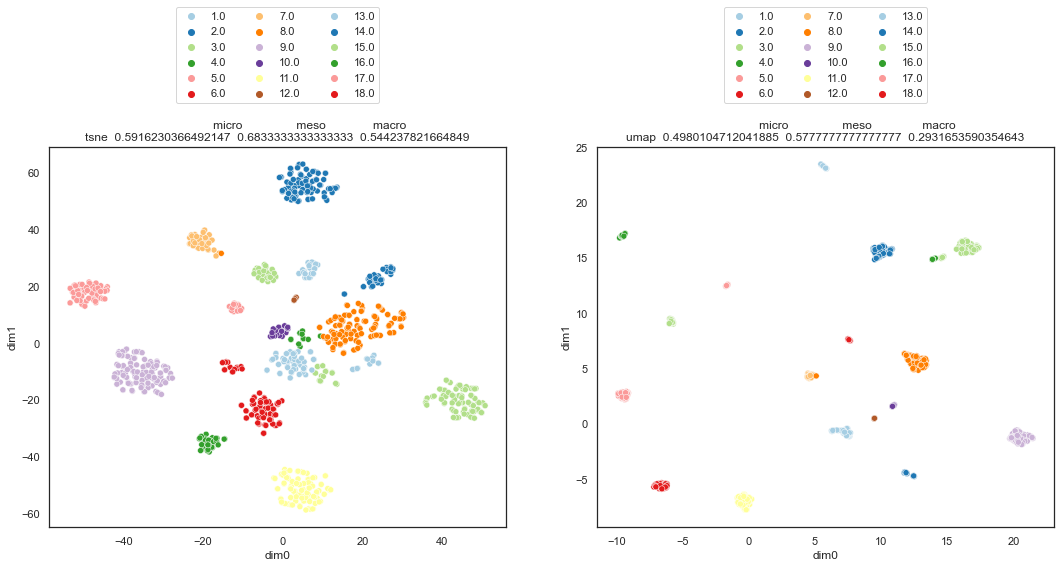

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,7))

clust_plt_tsne = sns.scatterplot(x=emb_tsne.dim0, y=emb_tsne.dim1, ax=ax1, palette="Paired", hue=emb_tsne.part_id)
ax1.legend(loc="lower center",bbox_to_anchor=(0.5, 1.1), ncol=3)
clust_plt_tsne.set(title = str(dist[dist.dim_reduc=='tsne'].drop(columns='dim_reduc')))

clust_plt_umap = sns.scatterplot(x=emb_umap.dim0, y=emb_umap.dim1, ax=ax2, palette="Paired", hue=emb_umap.part_id)
ax2.legend(loc="lower center",bbox_to_anchor=(0.5, 1.1), ncol=3)
clust_plt_umap.set(title = str(dist[dist.dim_reduc=='umap'].drop(columns='dim_reduc')))


In [60]:
dist.dim_reduc

tsne    tsne
umap    umap
Name: dim_reduc, dtype: object